In [50]:
!py -3.11 -m pip install seaborn 


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
#general imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import sklearn
import keras
import tensorflow as tf
import os
import sys
import json
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [52]:
with open(r"C:\Users\mail2\OneDrive\Desktop\loan_approval_dataset.json", 'r') as json_file:
    data = json.load(json_file)

df = pd.DataFrame(data)


In [53]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [54]:
df.to_csv('output.csv', index=False)


In [55]:
import os 
os.path

<module 'ntpath' (frozen)>

In [56]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [57]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

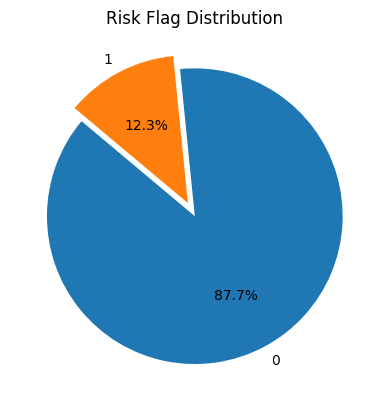

In [58]:

plt.pie(df['Risk_Flag'].value_counts(), labels=['0', '1'], explode=[0, 0.1], autopct='%1.1f%%', startangle=140)
plt.title('Risk Flag Distribution')
plt.show()

- Pie implies target Class is imbalanced by a huge %
- we can consider to under sample the majority or over sample the minority :

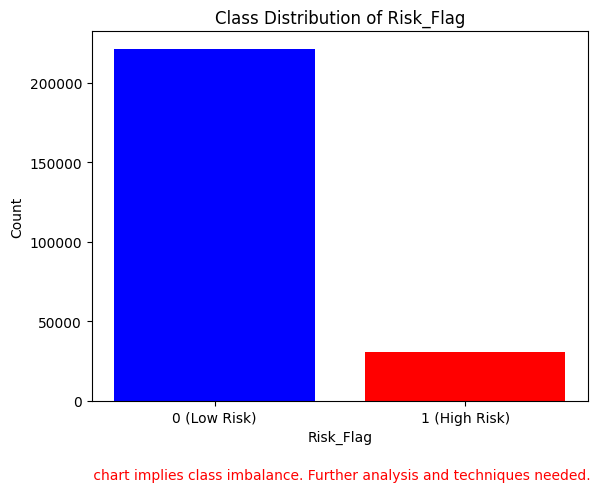

In [59]:

plt.bar(df['Risk_Flag'].value_counts().index.astype(str), df['Risk_Flag'].value_counts().values, color=['blue', 'red'])
plt.title('Class Distribution of Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Count')
plt.xticks(df['Risk_Flag'].value_counts().index.astype(str), ['0 (Low Risk)', '1 (High Risk)'])

# Adding analysis note
plt.text(0.5, -0.2, ' chart implies class imbalance. Further analysis and techniques needed.',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes,
         color='red')

plt.show()

In [60]:
df.nunique() #cardinality test 

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

In [61]:
df_0=df[df['Risk_Flag']==0]
df_0 = df_0.sample(n=30996, random_state=42)
df_1 = df[df['Risk_Flag'] == 1]
print(df_0.shape)
print(df_1.shape)

df_new = pd.concat([df_0, df_1])
df_new= df_new.sample(frac=1, random_state=42) #shuffle

(30996, 13)
(30996, 13)


# new dataset to counter imbalance class


In [62]:
df_new.Risk_Flag.value_counts()

Risk_Flag
1    30996
0    30996
Name: count, dtype: int64

In [63]:
df[:50].sort_values(by='Experience')

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
19,20,5431918,40,1,single,rented,no,Artist,Amaravati,Andhra_Pradesh,1,14,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
15,16,5694236,39,2,married,rented,yes,Economist,Anantapuram[24],Andhra_Pradesh,2,10,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
39,40,8739032,55,3,married,rented,no,Politician,Aurangabad[39],Bihar,3,14,0
37,38,7904011,71,3,single,rented,no,Computer_operator,Udupi,Karnataka,3,11,0
35,36,7537675,45,4,single,rented,no,Graphic_Designer,Gopalpur,West_Bengal,4,14,0
11,12,6623263,22,4,single,rented,no,Designer,Adoni,Andhra_Pradesh,4,14,0


In [64]:
flagdf = df[df['Risk_Flag'] == 1]
flagdf.head()



,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
14,15,9420838,48,6,single,rented,no,Technical_writer,Madurai,Tamil_Nadu,6,10,1
17,18,3666346,56,12,single,rented,no,Politician,Bhusawal,Maharashtra,12,11,1
28,29,8832725,64,5,single,rented,no,Biomedical_Engineer,Pondicherry,Puducherry,5,11,1


[]

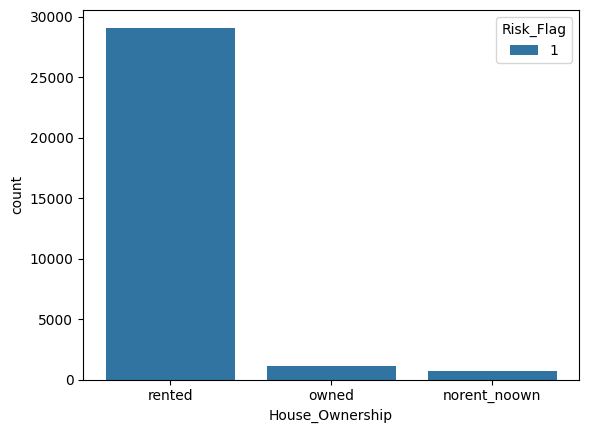

In [65]:
sns.countplot(data=flagdf, x= 'House_Ownership', hue='Risk_Flag')
plt.plot()

# people living on rent tend to be the defaulters much likely 


In [66]:
flagged = flagdf[flagdf['House_Ownership'] == 'rented']
flagged.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
14,15,9420838,48,6,single,rented,no,Technical_writer,Madurai,Tamil_Nadu,6,10,1
17,18,3666346,56,12,single,rented,no,Politician,Bhusawal,Maharashtra,12,11,1
28,29,8832725,64,5,single,rented,no,Biomedical_Engineer,Pondicherry,Puducherry,5,11,1


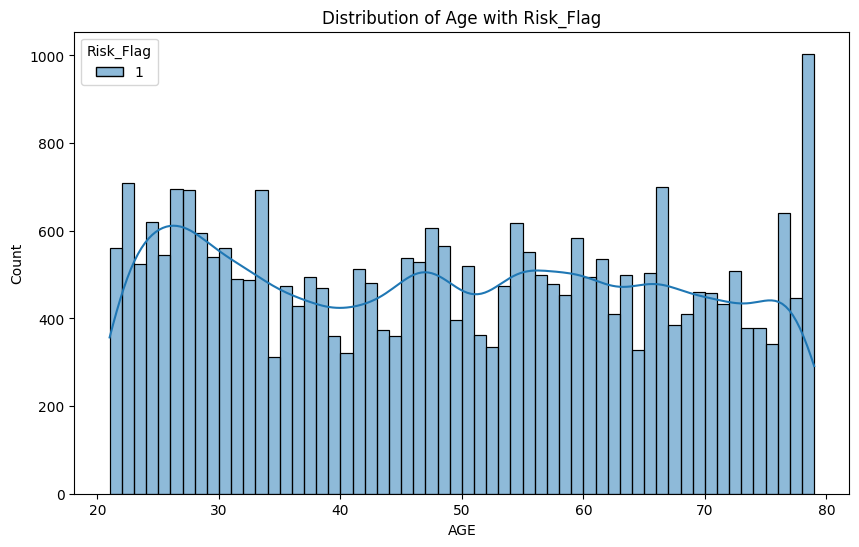

In [67]:

plt.figure(figsize=(10, 6))
sns.histplot(data=flagged, x='Age', hue='Risk_Flag', binwidth=1, kde=True)
plt.title('Distribution of Age with Risk_Flag')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.show()

# People with age 20 - 30 tend to be more into defaulting position 

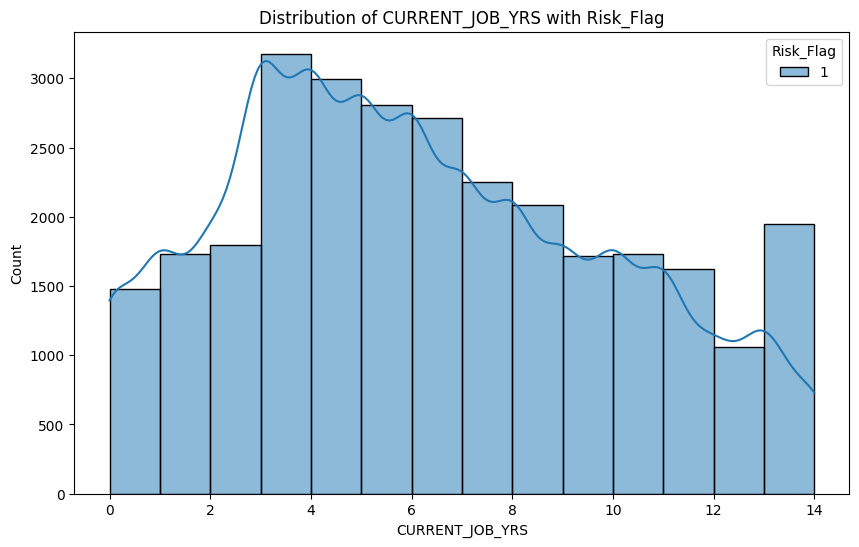

In [68]:
count_of_job_years = flagged['CURRENT_JOB_YRS'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(data=flagged, x='CURRENT_JOB_YRS', hue='Risk_Flag', binwidth=1, kde=True)
plt.title('Distribution of CURRENT_JOB_YRS with Risk_Flag')
plt.xlabel('CURRENT_JOB_YRS')
plt.ylabel('Count')
plt.show()

# as the experience increase the defaulters decrease 

In [69]:
flagged['Married/Single'].value_counts(
)   # singles are defaulters  

Married/Single
single     26624
married     2497
Name: count, dtype: int64

In [70]:
riskystates = flagged.STATE.value_counts().sort_values()[::-1]

<h1 style="color : red">top ten Risky States : </h1>

- Uttar_Pradesh        3165
- West_Bengal          2852
- Andhra_Pradesh       2757
- Maharashtra          2742
- Bihar                2458
- Madhya_Pradesh       2118
- Tamil_Nadu           1598
- Rajasthan            1224
- Gujarat              1177
- Karnataka            1140 

Text(0, 0.5, 'Count of Defaulters in each state ')

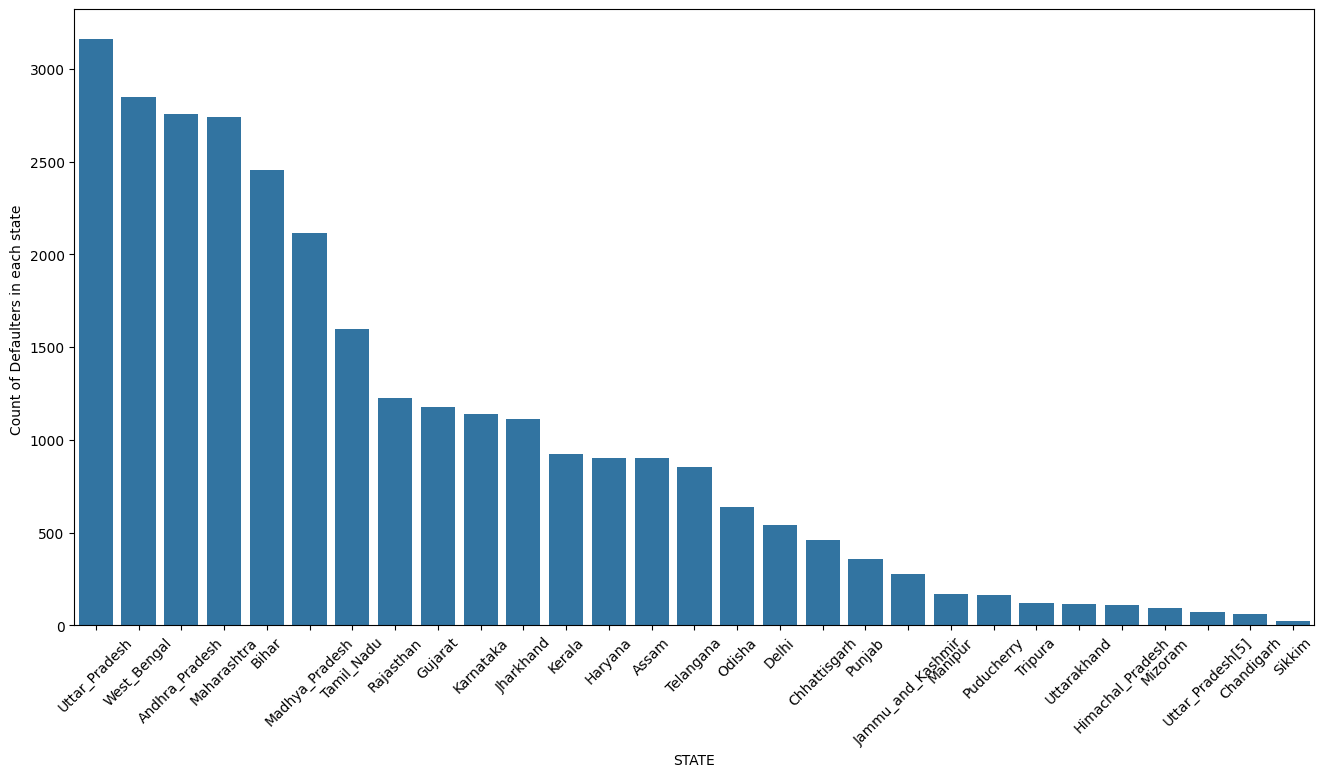

In [71]:
plt.figure(figsize=(16,8))
sns.barplot(data=riskystates)
plt.xticks(rotation=45
           )
plt.ylabel("Count of Defaulters in each state ")

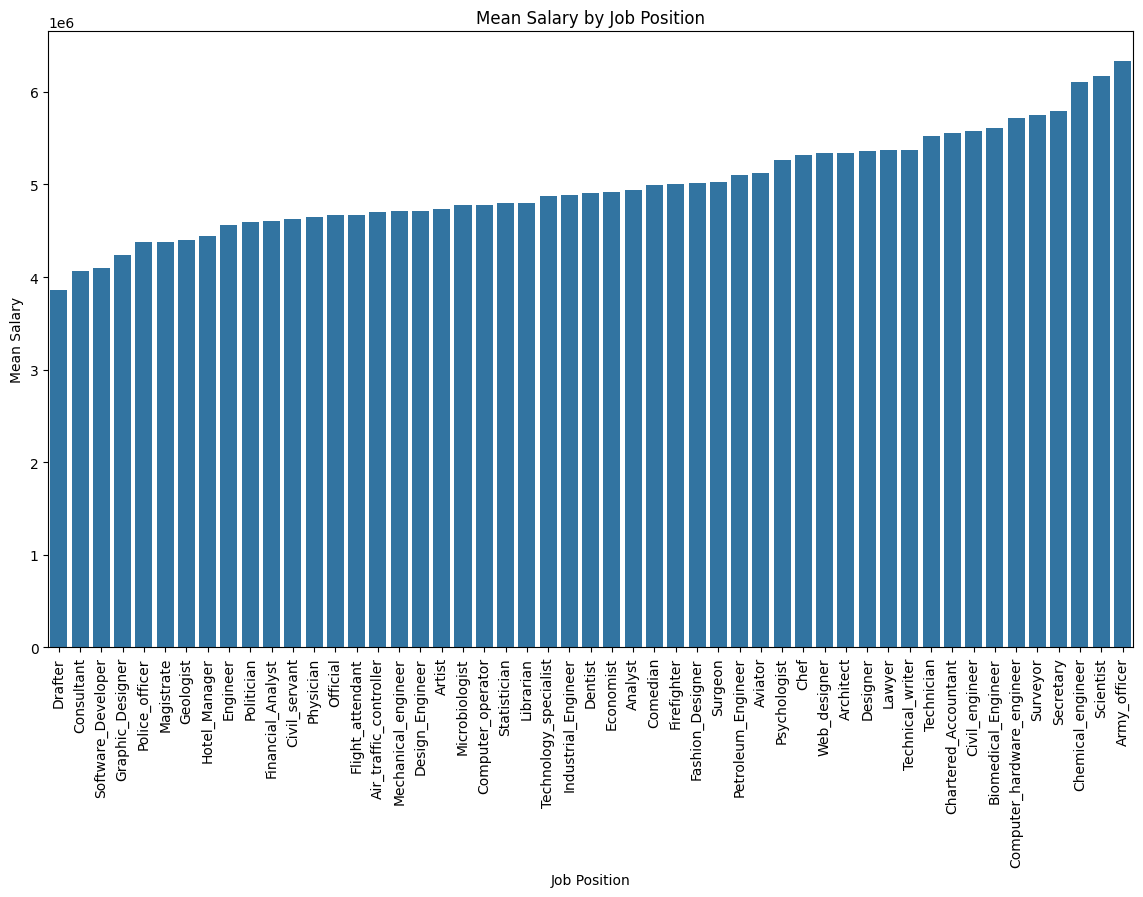

In [72]:
plt.figure(figsize=(14, 8))
mean_salaries = flagged.groupby('Profession')['Income'].mean().reset_index()
mean_salaries = mean_salaries.sort_values(by='Income')
sns.barplot(x='Profession', y='Income', data=mean_salaries)
plt.title('Mean Salary by Job Position')
plt.xlabel('Job Position')
plt.ylabel('Mean Salary')
plt.xticks(rotation=90)
plt.show()

In [73]:
df.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 35.0+ MB


In [75]:
catcolms = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() < 10]
print(catcolms)

['Married/Single', 'House_Ownership', 'Car_Ownership']


In [79]:
label_encoders = {}
for column in catcolms:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    df_new[column] = le.fit_transform(df_new[column])
    label_encoders[column] = le
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,1,2,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,0,2,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,1,2,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,1,2,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [80]:
df.groupby('STATE').sum().sort_values(by='Risk_Flag')

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
STATE,,,,,,,,,,,,
Sikkim,84111014,2794414893,27148,5900,596,1073,207,Hotel_ManagerChemical_engineerChartered_Accoun...,GangtokGangtokGangtokGangtokGangtokGangtokGang...,3795,7469,28
Chandigarh,84699325,2770147655,32881,7200,537,1185,185,SurgeonGeologistDentistMagistrateMechanical_en...,Chandigarh_cityChandigarh_cityChandigarh_cityC...,3789,8133,61
Mizoram,105811905,4290428951,38176,7429,694,1547,248,GeologistMicrobiologistCivil_servantSoftware_D...,AizawlAizawlAizawlAizawlAizawlAizawlAizawlAiza...,4797,9802,94
Uttar_Pradesh[5],96708715,3230631936,34662,7103,585,1360,174,OfficialDrafterCivil_servantChefSoftware_Devel...,AllahabadAllahabadAllahabadAllahabadAllahabadA...,4415,8956,97
Himachal_Pradesh,103313248,3530005560,38338,9596,748,1609,213,SurveyorMagistrateMicrobiologistIndustrial_Eng...,ShimlaShimlaShimlaShimlaShimlaShimlaShimlaShim...,5524,10306,111
Uttarakhand,232556672,8786402954,89382,17729,1782,3429,641,ArtistTechnical_writerComputer_operatorCivil_e...,HaridwarHaridwarDehradunDehradunDehradunHaridw...,11842,22416,133
Tripura,103859343,4021181844,40691,7998,681,1467,225,PsychologistDrafterFinancial_AnalystArchitectC...,AgartalaAgartalaAgartalaAgartalaAgartalaAgarta...,5763,9706,136
Puducherry,182263865,6083282667,71062,12635,1345,2807,393,Biomedical_EngineerMechanical_engineerWeb_desi...,PondicherryOzhukaraiOzhukaraiOzhukaraiOzhukara...,8377,16763,167
Manipur,105401721,5060276687,41418,8070,843,1642,238,TechnicianScientistMechanical_engineerGraphic_...,ImphalImphalImphalImphalImphalImphalImphalImph...,5166,10289,183


In [81]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,1,2,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,0,2,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,1,2,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,1,2,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [85]:
df['Job_Experience_Total'] = df['CURRENT_JOB_YRS'] + df['Experience']
df['Location'] = df['STATE'] + '_' + df['CITY']



df = df.drop(['CURRENT_JOB_YRS', 'Experience', 'STATE', 'CITY'], axis=1)


KeyError: 'CURRENT_JOB_YRS'

In [86]:
df_new['Job_Experience_Total'] = df_new['CURRENT_JOB_YRS'] + df_new['Experience']
df_new['Location'] = df_new['STATE'] + '_' + df_new['CITY']

df_new = df_new.drop(['CURRENT_JOB_YRS', 'Experience', 'STATE', 'CITY'], axis=1)

In [91]:
import category_encoders as ce
xz = ['Location','Profession']
encoder = ce.TargetEncoder(cols=xz)
df[xz] = encoder.fit_transform(df[xz], df['Risk_Flag'])
df_new[xz] = encoder.fit_transform(df_new[xz], df_new['Risk_Flag'])


c:\Users\mail2\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\mail2\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\mail2\AppData\Local\Programs\Python\Python311\Lib\site-packages\category_encoders\ordinal.py:198: Futur

In [92]:
df.head()

,Id,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_HOUSE_YRS,Risk_Flag,Job_Experience_Total,Location
0,1,1303834,23,1,2,0,0.111558,13,0,6,0.121554
1,2,7574516,40,1,2,0,0.148427,13,0,19,0.122497
2,3,3991815,66,0,2,0,0.134167,10,0,8,0.130814
3,4,6256451,41,1,2,1,0.148427,12,1,4,0.326194
4,5,5768871,47,1,2,0,0.115794,14,1,14,0.121137


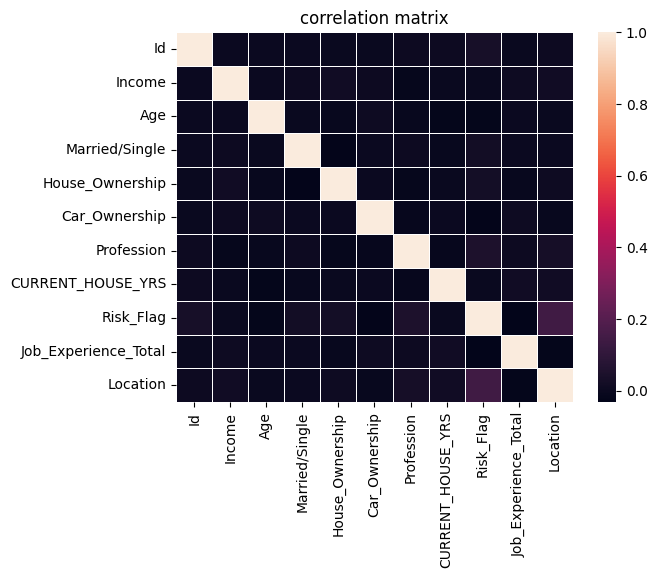

In [94]:
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=False, cmap=None, linewidths=0.5)
plt.title('correlation matrix')
plt.show()

In [102]:
df.head(-10
        )

,Id,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_HOUSE_YRS,Risk_Flag,Job_Experience_Total,Location
0,1,-1.283145,23,1,2,0,0.111558,13,0,6,0.121554
1,2,0.895457,40,1,2,0,0.148427,13,0,19,0.122497
2,3,-0.349269,66,0,2,0,0.134167,10,0,8,0.130814
3,4,0.437526,41,1,2,1,0.148427,12,1,4,0.326194
4,5,0.268128,47,1,2,0,0.115794,14,1,14,0.121137
...,...,...,...,...,...,...,...,...,...,...,...
251985,251986,-0.516908,71,1,1,0,0.123635,14,0,24,0.110764
251986,251987,1.732859,62,1,2,0,0.128444,10,0,12,0.203343
251987,251988,0.418100,72,1,2,0,0.119188,12,0,12,0.092332
251988,251989,1.236288,68,1,2,0,0.109578,11,0,14,0.073090


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Income'] = scaler.fit_transform(df[['Income']])
df_new['Income'] = scaler.fit_transform(df_new[['Income']])



# We know about the class imbalances and thus we will look into different techniques and choose the apt solution 


In [105]:
X = df.drop('Risk_Flag' , axis=1)
y = df['Risk_Flag']



In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [109]:
predicted = model.predict(X_test)

In [111]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.92      0.97      0.95     44147
           1       0.70      0.44      0.54      6253

    accuracy                           0.91     50400
   macro avg       0.81      0.71      0.74     50400
weighted avg       0.90      0.91      0.90     50400



In [112]:
print(confusion_matrix(y_test, predicted))


[[42995  1152]
 [ 3511  2742]]


In [114]:
print('ROC-AUC Score:', roc_auc_score(y_test, predicted))


ROC-AUC Score: 0.7062074385326597


<p style="color: red">The model has high precision for non-risky loans (0.92) but lower for risky loans (0.70), with high recall for non-risky loans (0.97) and lower for risky loans (0.44). The F1-score shows a good balance for non-risky loans (0.95) but lower for risky loans (0.54), while accuracy is 0.91 and ROC-AUC score is 0.71, indicating decent overall performance with room to improve on risky loan predictions.</p>

<h4> Using The Class Weight balance</h4>

In [115]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [116]:

predicted = clf.predict(X_test)

print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))
print('ROC-AUC Score:', roc_auc_score(y_test, predicted))

[[43025  1122]
 [ 3458  2795]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     44147
           1       0.71      0.45      0.55      6253

    accuracy                           0.91     50400
   macro avg       0.82      0.71      0.75     50400
weighted avg       0.90      0.91      0.90     50400

ROC-AUC Score: 0.7107851782461608


# slightly improved but not that much 

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,accuracy_score,precision_recall_fscore_support

model = LogisticRegression(class_weight='balanced',
                           )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.53, Precision: 0.14, Recall: 0.54, F1-score: 0.22, ROC-AUC: 0.54


c:\Users\mail2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC: 0.50 suggests that the model's ability to distinguish between the positive (class 1) and negative (class 0) classes is no better than random guessing.



Undersampling the Majority Class:



In [121]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Risk_Flag'] == 0]
df_minority = df[df['Risk_Flag'] == 1]


In [122]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=42) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_downsampled['Risk_Flag'].value_counts())


Risk_Flag
0    30996
1    30996
Name: count, dtype: int64


In [124]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df_downsampled.drop('Risk_Flag' , axis=1)
y = df_downsampled['Risk_Flag']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced',random_state=42)
model.fit(X_train, y_train)

preditct = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, preditct))

print("Confusion Matrix:")
print(confusion_matrix(y_test, preditct))

print(f"ROC-AUC Score: {roc_auc_score(y_test, preditct)}")




Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      6148
           1       0.83      0.92      0.87      6251

    accuracy                           0.86     12399
   macro avg       0.87      0.86      0.86     12399
weighted avg       0.87      0.86      0.86     12399

Confusion Matrix:
[[4943 1205]
 [ 488 5763]]
ROC-AUC Score: 0.8629668960188231


<p style="font-weight:bold; color:red;">We did a good job identifying the imbalance and achieving an accuracy of 86%, which is good.</p>


Further using XGB CLASSIFIER AND INDETYFING THE ACCURACY 

In [126]:
! py -3.11 -m pip install xgboost  

     ---------------------------------------- 99.8/99.8 MB 3.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [127]:
import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)


In [128]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      6148
           1       0.81      0.93      0.86      6251

    accuracy                           0.85     12399
   macro avg       0.86      0.85      0.85     12399
weighted avg       0.86      0.85      0.85     12399

Confusion Matrix:
[[4748 1400]
 [ 450 5801]]
ROC-AUC Score: 0.8501475938215531
